<a href="https://colab.research.google.com/github/tsutsumi-ozro/NLP-100knocks/blob/main/ch04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](https://nlp100.github.io/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい

In [1]:
!wget https://nlp100.github.io/data/neko.txt

--2023-01-05 00:26:06--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.111.153, 185.199.109.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.05s   

2023-01-05 00:26:06 (19.7 MB/s) - ‘neko.txt’ saved [975789/975789]



In [ ]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

In [3]:
!mecab -o ./neko.txt.mecab /content/neko.txt

In [4]:
!head -15 ./neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ


### 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [5]:
filename = './neko.txt.mecab'

sentences = []
morphs = []
with open(filename, mode='r') as f:
    for line in f:
        if line!='EOS\n':
            fields = line.split('\t')
            if len(fields)!=2 or fields[0]=='': continue
            else:
                attr = fields[1].split(',')
                morph = {'surface': fields[0], 'base':attr[6], 'pos':attr[0], 'pos1':attr[1]}
                morphs.append(morph)
        else:
            sentences.append(morphs)
            morphs = []
for morph in sentences[2]:
    print(morph)


{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


### 31. 動詞
動詞の表層形をすべて抽出せよ．

In [7]:
surface_verb = []
for morphs in sentences:
    for morph in morphs:
        if morph['pos']=='動詞':
            surface_verb.append(morph['surface'])

print(f'動詞の数: {len(surface_verb)}')
print(*surface_verb[:10], sep='\n')

動詞の数: 28905
生れ
つか
し
泣い
し
いる
始め
見
聞く
捕え


### 32. 動詞の基本形
動詞の基本形をすべて抽出せよ．

In [8]:
base_verb = []
for morphs in sentences:
    for morph in morphs:
        if morph['pos']=='動詞':
            base_verb.append(morph['base'])

print(*base_verb[:10], sep='\n')


生れる
つく
する
泣く
する
いる
始める
見る
聞く
捕える


### 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ

In [12]:
a_of_b = []
for morphs in sentences:
    for i in range(1, len(morphs)-1):
        if morphs[i-1]['pos']=='名詞' and morphs[i]['surface']=='の' and morphs[i+1]['pos']=='名詞':
            a_of_b.append((morphs[i-1]['surface'], morphs[i+1]['surface']))
            
print(f'ので連結されている名詞句の数： {len(a_of_b)}')
print(*a_of_b[:10], sep='\n')


ので連結されている名詞句の数： 6044
('彼', '掌')
('掌', '上')
('書生', '顔')
('はず', '顔')
('顔', '真中')
('穴', '中')
('書生', '掌')
('掌', '裏')
('何', '事')
('肝心', '母親')


### 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [15]:
concat_noun = []
noun_num = 0
nouns = []
for morphs in sentences:
    for i in range(len(morphs)):
        if morphs[i]['pos']!='名詞':
            if noun_num>=2:
                concat_noun.append(nouns)
                noun_num = 0
                nouns = []
            else:
                noun_num = 0
                nouns = []
        if morphs[i]['pos']=='名詞':
            nouns.append(morphs[i]['surface'])
            noun_num += 1
max_concat_num = 0
for i in range(len(concat_noun)):
    max_concat_num = max(max_concat_num, len(concat_noun[i]))

print(f'連接されている名詞の数： {len(concat_noun)}')
print(f'一番長い連接数: {max_concat_num}')
print(*concat_noun[:10], sep='\n')

連接されている名詞の数： 7338
一番長い連接数: 10
['人間', '中']
['一番', '獰悪']
['時', '妙']
['一', '毛']
['その後', '猫']
['一', '度']
['ぷうぷうと', '煙']
['邸', '内']
['三', '毛']
['書生', '以外']


### 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

出現頻度をsurfaceで数えるべきか、baseで数えるべきかわからんかった

In [20]:
from collections import defaultdict
freq_of_apper = defaultdict(int)
for morphs in sentences:
    for morph in morphs:
        if morph['pos']!='記号':
            freq_of_apper[morph['base']] += 1
freq_of_apper = sorted(freq_of_apper.items(), key=lambda x:x[1], reverse=True)
print(*freq_of_apper[:10], sep='\n')

('の', 9194)
('て', 6848)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5972)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)


### 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [31]:
!pip install japanize_matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=d03f06ac06af1c95a729058a6eea052b55a1da38b445a2ba096d5867835eafb1
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize_matplotlib


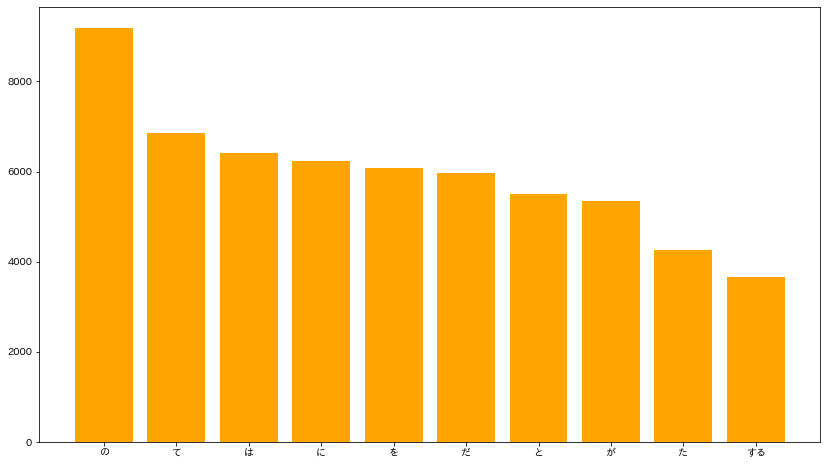

In [34]:
freq_word = [word[0] for word in freq_of_apper[:10]]
freq_num =  [word[1] for word in freq_of_apper[:10]]
plt.figure(figsize=(14, 8))
plt.bar(freq_word, freq_num, color='orange')
plt.show()

### 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

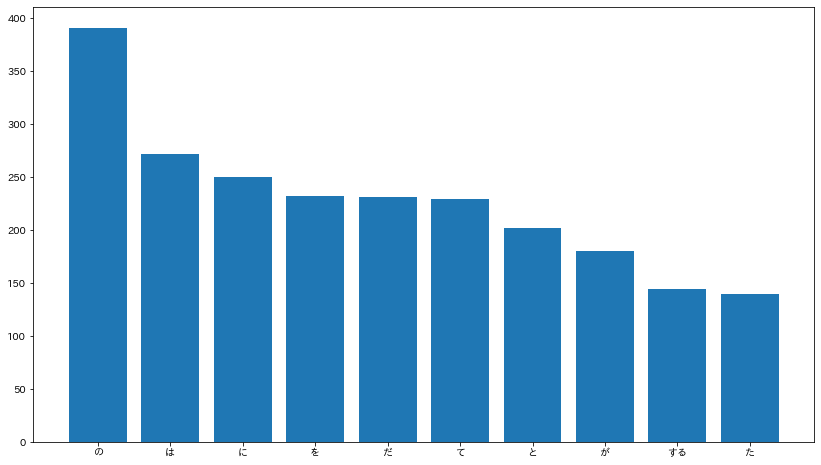

In [39]:
freq_with_cat = defaultdict(int)
for morphs in sentences:
    if '猫' in [morph['surface'] for morph in morphs]:
        for morph in morphs:
            if morph['pos']!='記号':
                freq_with_cat[morph['base']] += 1
del freq_with_cat['猫']
freq_with_cat = sorted(freq_with_cat.items(), key=lambda x:x[1], reverse=True)

freq_with_cat_word = [word[0] for word in freq_with_cat[:10]]
freq_with_cat_num = [word[1] for word in freq_with_cat[:10]]

plt.figure(figsize=(14, 8))
plt.bar(freq_with_cat_word, freq_with_cat_num)
plt.show()

### 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

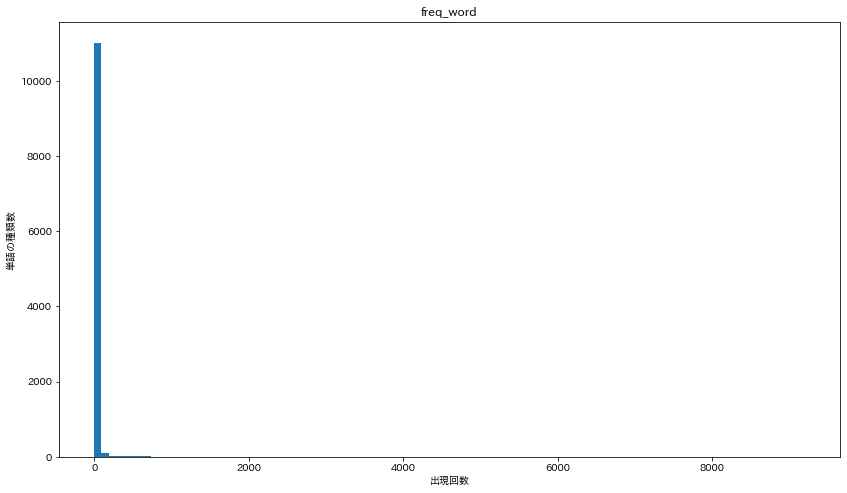

In [44]:
freq_of_apper_val = [items[1] for items in freq_of_apper]
plt.figure(figsize=(14, 8))
plt.hist(freq_of_apper_val, bins=100)
plt.title('freq_word')
plt.xlabel('出現回数')
plt.ylabel('単語の種類数')
plt.show()

### 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

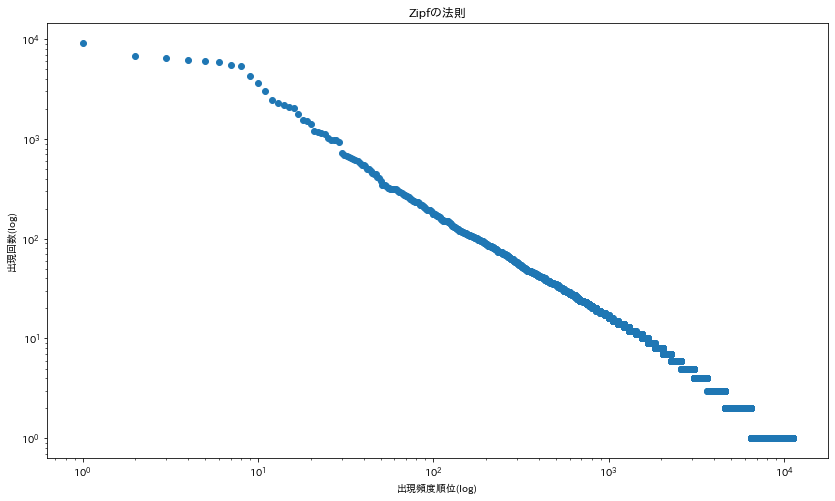

In [45]:
ranks = [rank+1 for rank in range(len(freq_of_apper))]
plt.figure(figsize=(14, 8))
plt.scatter(ranks, freq_of_apper_val)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位(log)')
plt.ylabel('出現回数(log)')
plt.title('Zipfの法則')
plt.show()